In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('../data/Week1_challenge_data_source(CSV).csv', na_values=['?', None])


In [3]:
db = db.drop(['Start',
 'Start ms',
 'End',
 'End ms','Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B'],axis=1)

In [4]:
db.dropna(subset=['Bearer Id'],inplace=True)

In [5]:
# fill undefined rows with ffill method for columns ('Handset Manufacturer','Handset Type','IMEI')

def fix_undefined(df, col):
    df[col] = df[col].apply(lambda x: np.nan if x == 'undefined' else x)
    df[col] = df[col].fillna(method='ffill')
    return df[col]


db['Handset Manufacturer'] = fix_undefined(db, 'Handset Manufacturer')
db['Handset Type'] = fix_undefined(db, 'Handset Type')
db['IMEI'] = fix_undefined(db, 'IMEI')


To add DL and UL

In [6]:
db['TCP'] = db['TCP DL Retrans. Vol (Bytes)'] + db['TCP UL Retrans. Vol (Bytes)']
db['RTT'] = db['Avg RTT DL (ms)'] + db['Avg RTT UL (ms)']
db['throughput'] = db['Avg Bearer TP UL (kbps)'] + db['Avg Bearer TP DL (kbps)']
db = db.drop(['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Avg RTT UL (ms)',\
        'Avg RTT DL (ms)', 'Avg Bearer TP UL (kbps)','Avg Bearer TP DL (kbps)'], axis=1)
db.head(2)

,Bearer Id,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),TCP,RTT,throughput
0,1.311448e+19,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,NaN,47.0,67.0
1,1.311448e+19,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,NaN,70.0,42.0


In [7]:
def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

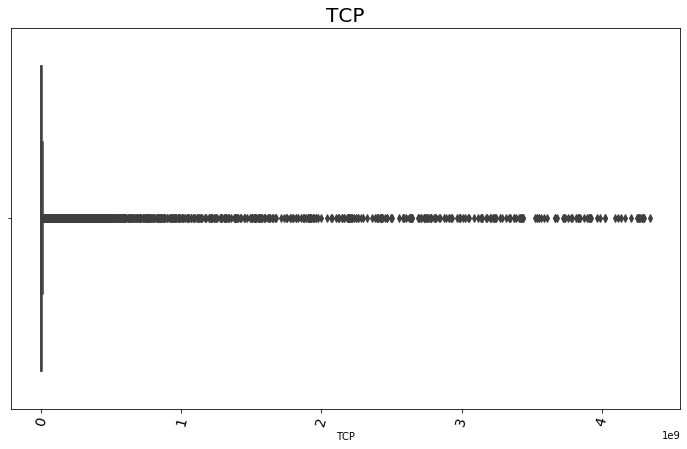

In [8]:
plot_box(db, 'TCP', 'TCP')

In [85]:
# for TCP
def fix_outlier_tcp(df, column):
    fixed = np.where(df[column] > df[column].quantile(0.5), df[column].median(),df[column])
    return fixed

In [86]:
db["fixed_TCP"] = fix_outlier_tcp(db, "TCP")

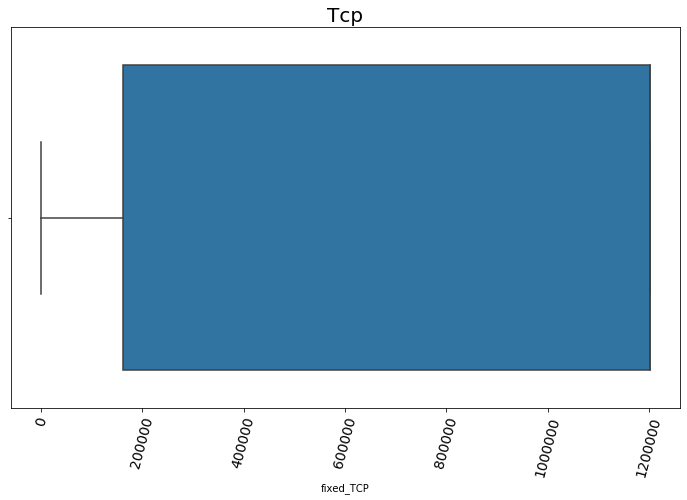

In [87]:
plot_box(db, 'fixed_TCP', 'Tcp')

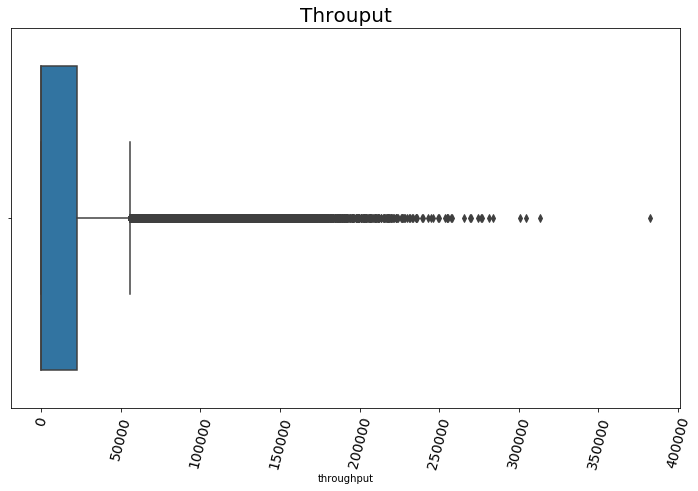

In [54]:
plot_box(db, 'throughput', 'Throuput')

In [55]:
def fix_outlier(df, column):
    fixed = np.where(df[column] > df[column].quantile(0.75), df[column].mean(),df[column])
    return fixed


In [56]:
db["fixed_throughput"] = fix_outlier(db, "throughput")

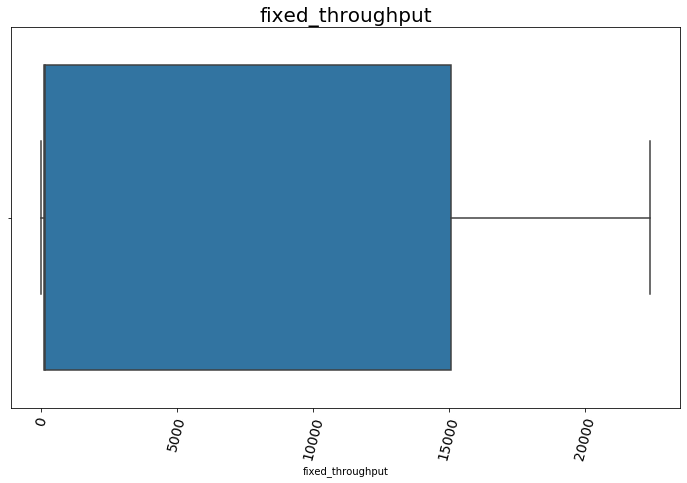

In [57]:
plot_box(db, 'fixed_throughput', 'fixed_throughput')

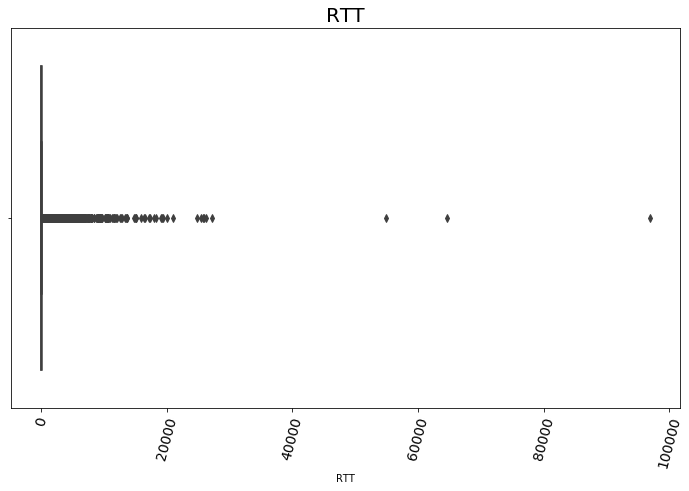

In [58]:
plot_box(db, 'RTT', 'RTT')

In [64]:
db["fixed_RTT"] = np.where(db['RTT'] > db['RTT'].quantile(0.75), db['RTT'].mean(),db['RTT'])

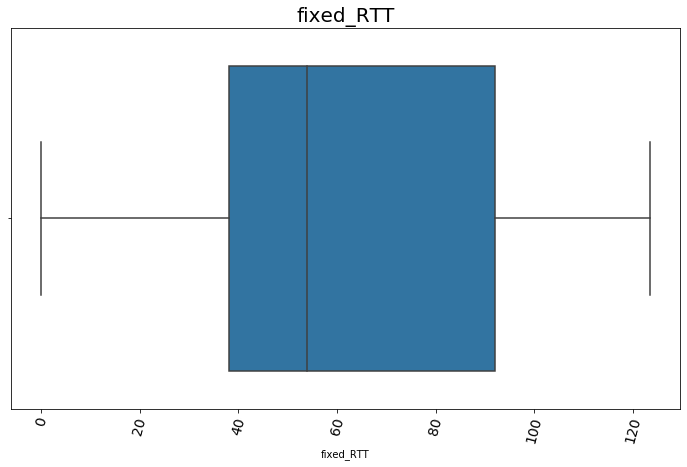

In [65]:
plot_box(db, 'fixed_RTT', 'fixed_RTT')

Aggregate, per customer:

In [76]:
db.groupby(['MSISDN/Number','Handset Type']).agg({'fixed_RTT':'sum','fixed_TCP':'sum','fixed_throughput':'sum'})

fixed_RTT     fixed_TCP  \
MSISDN/Number Handset Type                                                
3.360100e+10  Huawei P20 Lite Huawei Nova 3E         46.0  0.000000e+00   
              Apple iPhone 7 (A1778)                 31.0  0.000000e+00   
              Apple iPhone 7 Plus (A1784)             0.0  0.000000e+00   
3.360101e+10  Apple iPhone 5S (A1457)                84.0  0.000000e+00   
              Apple iPhone Se (A1723)               119.0  2.590595e+07   
...                                                   ...           ...   
3.379000e+10  Huawei Honor 9 Lite                    52.0  2.180450e+05   
              Apple iPhone 8 Plus (A1897)            40.0  0.000000e+00   
3.197021e+12  Quectel Wireless. Quectel Ec25-E        0.0  0.000000e+00   
3.370000e+14  Huawei B525S-23A                        0.0  0.000000e+00   
8.823971e+14  Quectel Wireless. Quectel Ec21-E        0.0  0.000000e+00   

                                                fixed_throughput  
MSISDN/Number Handset Type                                        
3.360100e+10  Huawei P20 Lite Huawei Nova 3E           76.000000  
              Apple iPhone 7 (A1778)                   99.000000  
              Apple iPhone 7 Plus (A1784)              97.000000  
3.360101e+10  Apple iPhone 5S (A1457)                 248.000000  
              Apple iPhone Se (A1723)               15144.812241  
...                                                          ...  
3.379000e+10  Huawei Honor 9 Lite                   10365.000000  
              Apple iPhone 8 Plus (A1897)             116.000000  
3.197021e+12  Quectel Wireless. Quectel Ec25-E          1.000000  
3.370000e+14  Huawei B525S-23A                         33.000000  
8.823971e+14  Quectel Wireless. Quectel Ec21-E          2.000000  

[108267 rows x 3 columns]

In [89]:
db['TCP'].sort_values(ascending=False)[:10]

34636     4.344116e+09
140797    4.301477e+09
77950     4.294432e+09
135677    4.291465e+09
3741      4.288121e+09
119667    4.275492e+09
39608     4.268647e+09
59011     4.261616e+09
76971     4.260174e+09
41182     4.254660e+09
Name: TCP, dtype: float64